In [0]:
import sys
print(sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [0]:
from sklearn.datasets import load_files
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from google.colab import drive
import nltk
import spacy
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
drive.mount('/content/drive')
from sklearn import metrics
import numpy as np
from google.colab import files
from sklearn.cluster import KMeans
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import logging
from optparse import OptionParser
import pandas as pd
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


    100% |████████████████████████████████| 1.6MB 13.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import pandas as pd
p='drive/My Drive/docs.txt'
df = pd.read_csv(p, sep="|", encoding='latin-1')
df

,patent,abs,title1
0,09532690,A robot cleaner capable of vacuuming foreign m...,Robot cleaner and control method thereof
1,09532840,One exemplary user interface for a medical rob...,Slider control of catheters and wires
2,09532841,"Robotic, telerobotic, and/or telesurgical devi...",Autofocus and/or autoscaling in telesurgery
3,09533411,A method for controlling a tele-operated robot...,System and method for controlling a teleoperat...
4,09533420,A distal end side link hub is connected to a p...,Link actuation device
5,09533660,An apparatus facilitating packing of a racecar...,Retainer apparatus for use with a pilot chute ...
6,09533750,A flight control surface such as a slat capabl...,"Slat, wing of aircraft, flight control surface..."
7,09533761,An aircraft may include a cabin having a first...,Aircraft configuration with ramp access to mul...
8,09533770,An aircraft assembly comprising a plurality of...,Aircraft bonding network
9,09533771,Preventing damage to a metal component or redu...,Apparatus for preventing lightning strike dama...


In [0]:
patent_list = df['patent']
df['abs'] = df['abs'] + " " + df['title1']
abs_list = df['abs']
## added title twice
abs_list = df['abs'] + " " + df['title1']
patents_dict = dict(zip(patent_list, abs_list))
v = TfidfVectorizer(stop_words=stop_words)
## x = v.fit_transform(df['abs'])
x = v.fit_transform(patents_dict.values())
x
##v.get_feature_names()
##print(x.shape)
##patents_dict


<1304x7478 sparse matrix of type '<class 'numpy.float64'>'
	with 52169 stored elements in Compressed Sparse Row format>

In [0]:
k = 4
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5, verbose=1)
km.fit(x)


Initialization complete
Iteration  0, inertia 2456.074
Iteration  1, inertia 1261.976
Iteration  2, inertia 1257.458
Iteration  3, inertia 1256.378
Iteration  4, inertia 1255.935
Iteration  5, inertia 1255.747
Iteration  6, inertia 1255.639
Iteration  7, inertia 1255.489
Iteration  8, inertia 1255.295
Iteration  9, inertia 1255.163
Iteration 10, inertia 1255.084
Iteration 11, inertia 1254.937
Iteration 12, inertia 1254.745
Iteration 13, inertia 1254.577
Iteration 14, inertia 1254.401
Iteration 15, inertia 1254.229
Iteration 16, inertia 1254.047
Iteration 17, inertia 1253.968
Iteration 18, inertia 1253.926
Iteration 19, inertia 1253.915
Converged at iteration 19: center shift 0.000000e+00 within tolerance 1.309854e-08
Initialization complete
Iteration  0, inertia 2430.221
Iteration  1, inertia 1264.799
Iteration  2, inertia 1258.106
Iteration  3, inertia 1254.359
Iteration  4, inertia 1252.866
Iteration  5, inertia 1252.272
Iteration  6, inertia 1251.861
Iteration  7, inertia 1251.731
I

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [0]:
## modified code from https://beckernick.github.io/law-clustering/

cluster_assignments_dict = {}

for i in set(km.labels_):
  current_cluster_patents = [list(patents_dict.keys())[x] for x in 
                             np.where(km.labels_ == i)[0]]
  cluster_assignments_dict[i] = current_cluster_patents
  
cluster_pick = np.random.choice(len(set(km.labels_)))



In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

k = 4
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(x)
x_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1304 samples in 0.001s...
[t-SNE] Computed neighbors for 1304 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1304
[t-SNE] Computed conditional probabilities for sample 1304 / 1304
[t-SNE] Mean sigma: 0.027293
[t-SNE] Computed conditional probabilities in 0.148s
[t-SNE] Iteration 50: error = 68.3897324, gradient norm = 0.1595644 (50 iterations in 0.775s)
[t-SNE] Iteration 100: error = 62.3704071, gradient norm = 0.0680554 (50 iterations in 0.605s)
[t-SNE] Iteration 150: error = 62.0995255, gradient norm = 0.0414421 (50 iterations in 0.554s)
[t-SNE] Iteration 200: error = 62.0898132, gradient norm = 0.0419849 (50 iterations in 0.577s)
[t-SNE] Iteration 250: error = 62.0927696, gradient norm = 0.0481284 (50 iterations in 0.576s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.092770
[t-SNE] Iteration 300: error = 0.8021139, gradient norm = 0.0006186 (50 iterations in 0.495s

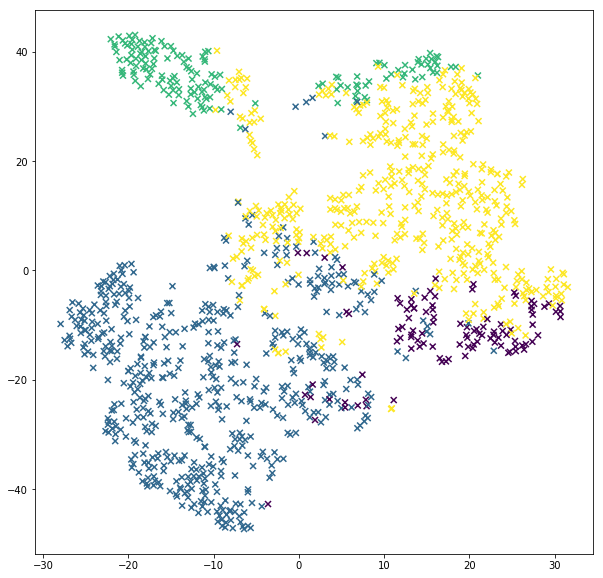

In [0]:


fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], marker="x", c = km.labels_)


In [0]:

a_list = []
b_list = []
abstract_list1 = []
for key, values in cluster_assignments_dict.items():
  for value in values:
    a_list.append(key+1)
    b_list.append(value)
    abstract_list1.append(df['abs'].where(df['patent'] == value))
csv_df = pd.DataFrame({'clusterNum': b_list, 'patent': a_list})
col_list = list(csv_df)
col_list[0], col_list[1] = col_list[1], col_list[0]
csv_df.columns = col_list

## need to output to csv
csv_df.to_csv('F:\\docs\\output.csv')

csv_df
cluster1docs = []
cluster2docs = []
cluster3docs = []
cluster4docs = []

joined_df = csv_df.set_index('patent').join(df.set_index('patent'))

for index, row in joined_df.iterrows():
 ## print(row['clusterNum'])
  if int(row['clusterNum']) == 1:
    cluster1docs.append(row['abs'])
  if int(row['clusterNum']) == 2:
    cluster2docs.append(row['abs'])
  if int(row['clusterNum']) == 3:
    cluster3docs.append(row['abs'])
  if int(row['clusterNum']) == 4:
    cluster4docs.append(row['abs'])
    
len(cluster1docs)
len(cluster2docs)
len(cluster3docs)
len(cluster4docs)
text1 = " ".join(cluster1docs)
text2 = " ".join(cluster2docs)
text3 = " ".join(cluster3docs)
text4 = " ".join(cluster4docs)
  

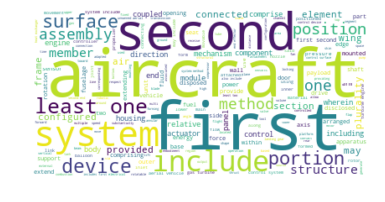

In [0]:
## modified from https://andrew47.github.io/scikitlearn-cluster.html
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud1 = WordCloud(stopwords=stop_words, background_color="white").generate(text1)
wordcloud2 = WordCloud(stopwords=stop_words, background_color="white").generate(text2)
wordcloud3 = WordCloud(stopwords=stop_words, background_color="white").generate(text3)
wordcloud4 = WordCloud(stopwords=stop_words, background_color="white").generate(text4)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()




In [0]:
from google.colab import files

files.download

csv_df.to_csv('C:\\Users\\sspen\\OneDrive\\Documents\\webtext\\output.csv')

In [0]:
data = abs_list

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))

print(data_words[:1])

[['robot', 'cleaner', 'capable', 'of', 'vacuuming', 'foreign', 'materials', 'on', 'floor', 'includes', 'main', 'body', 'to', 'which', 'dust', 'collector', 'is', 'mounted', 'and', 'vacuuming', 'unit', 'provided', 'at', 'front', 'portion', 'of', 'the', 'main', 'body', 'to', 'clean', 'floor', 'the', 'vacuuming', 'unit', 'is', 'configured', 'to', 'move', 'relative', 'to', 'the', 'main', 'body', 'if', 'it', 'is', 'determined', 'that', 'the', 'robot', 'cleaner', 'is', 'located', 'near', 'wall', 'or', 'an', 'obstacle', 'the', 'vacuuming', 'unit', 'moves', 'to', 'the', 'wall', 'or', 'the', 'obstacle', 'since', 'the', 'vacuuming', 'unit', 'contacts', 'the', 'wall', 'or', 'the', 'obstacle', 'region', 'of', 'floor', 'near', 'the', 'wall', 'or', 'the', 'obstacle', 'may', 'be', 'cleaned', 'further', 'manual', 'cleaner', 'may', 'be', 'selectively', 'connected', 'to', 'channel', 'connector', 'of', 'the', 'robot', 'cleaner', 'so', 'that', 'user', 'may', 'choose', 'automatic', 'or', 'manual', 'cleaning

In [0]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['robot', 'cleaner', 'capable', 'of', 'vacuuming', 'foreign', 'materials', 'on', 'floor', 'includes', 'main', 'body', 'to', 'which', 'dust', 'collector', 'is', 'mounted', 'and', 'vacuuming', 'unit', 'provided', 'at', 'front', 'portion', 'of', 'the', 'main', 'body', 'to', 'clean', 'floor', 'the', 'vacuuming', 'unit', 'is', 'configured', 'to', 'move', 'relative', 'to', 'the', 'main', 'body', 'if', 'it', 'is', 'determined', 'that', 'the', 'robot', 'cleaner', 'is', 'located', 'near', 'wall', 'or', 'an', 'obstacle', 'the', 'vacuuming', 'unit', 'moves', 'to', 'the', 'wall', 'or', 'the', 'obstacle', 'since', 'the', 'vacuuming', 'unit', 'contacts', 'the', 'wall', 'or', 'the', 'obstacle', 'region', 'of', 'floor', 'near', 'the', 'wall', 'or', 'the', 'obstacle', 'may', 'be', 'cleaned', 'further', 'manual', 'cleaner', 'may', 'be', 'selectively', 'connected', 'to', 'channel', 'connector', 'of', 'the', 'robot', 'cleaner', 'so', 'that', 'user', 'may', 'choose', 'automatic', 'or', 'manual', 'cleaning'

In [0]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
  
  

In [0]:
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['robot', 'cleaner', 'capable', 'vacuum', 'foreign', 'material', 'floor', 'include', 'main', 'body', 'dust', 'collector', 'mount', 'vacuum', 'unit', 'provide', 'front', 'portion', 'main', 'body', 'clean', 'floor', 'vacuum', 'unit', 'configure', 'move', 'relative', 'main', 'body', 'determine', 'robot', 'cleaner', 'locate', 'wall', 'obstacle', 'vacuum', 'unit', 'move', 'wall', 'obstacle', 'vacuum', 'unit', 'contact', 'wall', 'obstacle', 'region', 'floor', 'wall', 'obstacle', 'may', 'clean', 'manual', 'clean', 'may', 'selectively', 'connect', 'channel', 'connector', 'robot', 'clean', 'user', 'may', 'choose', 'automatic', 'manual', 'cleaning', 'floor', 'user', 'convenience', 'robot', 'clean', 'control', 'method', 'thereof', 'robot', 'clean', 'control', 'method', 'thereof']]


In [0]:
id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 6), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 2), (24, 1), (25, 3), (26, 2), (27, 1), (28, 2), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 5), (35, 1), (36, 2), (37, 4), (38, 2), (39, 5), (40, 4)]]


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.037*"side" + 0.034*"compressed" + 0.032*"material" + 0.028*"face" + '
  '0.028*"delivery" + 0.020*"bottom" + 0.019*"pulse" + 0.018*"respectively" + '
  '0.017*"place" + 0.017*"plate"'),
 (1,
  '0.072*"structure" + 0.041*"module" + 0.038*"incorporate" + 0.035*"support" '
  '+ 0.035*"topology" + 0.032*"surface" + 0.024*"seat" + 0.024*"payload" + '
  '0.023*"internal" + 0.018*"method"'),
 (2,
  '0.045*"edge" + 0.045*"part" + 0.030*"aircraft" + 0.029*"design" + '
  '0.023*"balloon" + 0.021*"space" + 0.020*"house" + 0.018*"body" + '
  '0.017*"comprise" + 0.016*"region"'),
 (3,
  '0.106*"device" + 0.106*"control" + 0.075*"system" + 0.037*"method" + '
  '0.033*"robot" + 0.032*"include" + 0.028*"medical" + 0.024*"signal" + '
  '0.017*"function" + 0.016*"sensor"'),
 (4,
  '0.119*"first" + 0.090*"second" + 0.031*"portion" + 0.030*"drive" + '
  '0.026*"include" + 0.025*"mechanism" + 0.023*"member" + 0.023*"actuator" + '
  '0.023*"end" + 0.022*"arm"'),
 (5,
  '0.079*"system" + 0.054*"use

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.219908  0.164238       1        1  12.780105
12     0.255514  0.068073       2        1  12.208750
4     -0.087015  0.156861       3        1   9.169189
10    -0.019482  0.156900       4        1   6.049250
15     0.157173 -0.093502       5        1   5.581788
17    -0.086536  0.129720       6        1   4.898438
2     -0.135792  0.116963       7        1   4.669047
5      0.185336 -0.009323       8        1   4.585840
1     -0.057303  0.121918       9        1   4.466109
14    -0.026869 -0.164746      10        1   4.332411
7     -0.147917  0.060436      11        1   4.087810
19     0.061078 -0.097518      12        1   3.581505
8     -0.050915 -0.171906      13        1   3.388267
13    -0.169735  0.074693      14        1   3.232126
6      0.098585 -0.087265      15        1   3.187565
9     -0.060840 -0.053973      16        1   3.128821
11     0.051697 -0.041610      17        1   2.962974
18     0.050425 -0.012283      18        1   2.650024
16    -0.090550 -0.185462      19        1   2.576565
0     -0.146763 -0.132214      20        1   2.463423, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
13    Default  1346.000000       control  1346.000000  30.0000  30.0000
230   Default  1092.000000         first  1092.000000  29.0000  29.0000
71    Default  1509.000000        device  1509.000000  28.0000  28.0000
249   Default   721.000000     component   721.000000  27.0000  27.0000
57    Default  2076.000000        system  2076.000000  26.0000  26.0000
237   Default   823.000000        second   823.000000  25.0000  25.0000
309   Default   704.000000         power   704.000000  24.0000  24.0000
78    Default   598.000000         image   598.000000  23.0000  23.0000
372   Default   658.000000       turbine   658.000000  22.0000  22.0000
478   Default   785.000000         datum   785.000000  21.0000  21.0000
1085  Default   405.000000    inspection   405.000000  20.0000  20.0000
404   Default   404.000000          wind   404.000000  19.0000  19.0000
1933  Default   375.000000        instal   375.000000  18.0000  18.0000
193   Default   549.000000      aircraft   549.000000  17.0000  17.0000
625   Default   312.000000       vehicle   312.000000  16.0000  16.0000
791   Default   292.000000  distribution   292.000000  15.0000  15.0000
467   Default   290.000000         level   290.000000  14.0000  14.0000
38    Default   443.000000          user   443.000000  13.0000  13.0000
1251  Default   293.000000      adaptive   293.000000  12.0000  12.0000
258   Default   536.000000       network   536.000000  11.0000  11.0000
92    Default   318.000000     structure   318.000000  10.0000  10.0000
335   Default   346.000000        engine   346.000000   9.0000   9.0000
324   Default   320.000000         blade   320.000000   8.0000   8.0000
687   Default   265.000000      location   265.000000   7.0000   7.0000
253   Default   285.000000    electrical   285.000000   6.0000   6.0000
37    Default   346.000000          unit   346.000000   5.0000   5.0000
34    Default   425.000000         robot   425.000000   4.0000   4.0000
401   Default   283.000000         rotor   283.000000   3.0000   3.0000
397   Default   300.000000          flow   300.000000   2.0000   2.0000
505   Default   564.000000      generate   564.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
190   Topic20    29.850441           top    30.747026   3.6740  -4.4093
884   Topic20    25.207376    production    26.103962   3.6687  -4.5783
2326  Topic20    21.717503     appliance    22.614088   3.6632  -4.7273
154   Topic20    19.691133          away    20.587719   3.6591  -4.8253
5543  Topic20    19.587538  nanoparticle    20.484123   3.6589  -4.8306
3562  Topic20    19.522333       